### Basic steps of setting up a pytorch model
1. __Data:__ preprocessing is outside the scope of this tutorial, the input is expect to be some torch tensor type
2. __Network:__ input parameters, target parameters
3. __Loss function__
4. __Optimiser__
5. __Training function__
6. __Prediction function:__ use the trained network to make predictions on unseen input
7. __Train the network__ using the given loss function and optimiser
8. __Plot__ the losses, accuracy, etc..


##### 1 - Data
Working with torch tensors

In [1]:
import torch

# every seed produces the same random array
torch.manual_seed(0)
tensor_1 = torch.rand(2,2)

tensor_2 = torch.rand(2,2)

torch.manual_seed(0)
tensor_3 = torch.rand(2,2)

print('Random tensor as seed 0:', tensor_1)
print('Different random tensor without seed 0:',tensor_2)
print('Same tensor as the first one, because we use seed 0:',tensor_3)


Random tensor as seed 0: 
 0.5488  0.5928
 0.7152  0.8443
[torch.FloatTensor of size 2x2]

Different random tensor without seed 0: 
 0.6028  0.8579
 0.5449  0.8473
[torch.FloatTensor of size 2x2]

Same tensor as the first one, because we use seed 0: 
 0.5488  0.5928
 0.7152  0.8443
[torch.FloatTensor of size 2x2]



In [2]:
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)
    tensor_4 = torch.rand(2,2).cuda()

if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)
    tensor_5 = torch.rand(2,2).cuda()
    
print('Random tensor as seed 0:', tensor_4)
print('Random tensor as seed 0:', tensor_5)

Random tensor as seed 0: 
 0.6028  0.8579
 0.5449  0.8473
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

Random tensor as seed 0: 
 0.4237  0.6236
 0.6459  0.3844
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]



In [3]:
# Tensors on CPU vs GPU

if torch.cuda.is_available():
    tensor_1 = tensor_1.cuda()  # convert to gpu tensor with .cuda()

print(type(tensor_1))

tensor_1 = tensor_1.cpu()  # back to CPU with .cpu()
print(type(tensor_1))

<class 'torch.cuda.FloatTensor'>
<class 'torch.FloatTensor'>


#### (re)size


In [4]:
print(tensor_1.size())
print(tensor_1)
print(tensor_1.view(4).size())
print(tensor_1.view(4))


torch.Size([2, 2])

 0.5488  0.5928
 0.7152  0.8443
[torch.FloatTensor of size 2x2]

torch.Size([4])

 0.5488
 0.5928
 0.7152
 0.8443
[torch.FloatTensor of size 4]



###### inplace is faster due to memory efficiency

In [5]:
%timeit tensor_4 - tensor_5

5.25 µs ± 42.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [6]:
%timeit tensor_4.sub(tensor_5)

4.79 µs ± 72.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [7]:
%timeit tensor_4.sub_(tensor_5)

3.3 µs ± 6.72 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


###### subtract

In [8]:
print(tensor_1.size()) 
print(type(tensor_4)) # size works the same on cuda tensors
print(tensor_4.size())

torch.Size([2, 2])
<class 'torch.cuda.FloatTensor'>
torch.Size([2, 2])


In [9]:
print(tensor_4.add(tensor_1.cuda())) # to add two tensor, they have to be the same type
print(tensor_1.add(torch.rand(2,2).float())) # both GPU/CPU and float/long/double


1.00000e+05 *
 -3.4531 -5.0686
 -5.2706 -3.1224
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]


 0.9864  0.8904
 1.6070  0.9010
[torch.FloatTensor of size 2x2]



In [10]:
print(tensor_4.sub(tensor_5))
print(tensor_4)                 # sub subtracts tensor_4 with tensor_5 == tensor_4 - tensor_5
print(tensor_4.sub_(tensor_5))
print(tensor_4)                 # sub_ replaces tensor_4 with tensor_5


1.00000e+05 *
 -3.4531 -5.0686
 -5.2706 -3.1224
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]


1.00000e+05 *
 -3.4531 -5.0686
 -5.2706 -3.1224
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]


1.00000e+05 *
 -3.4531 -5.0686
 -5.2706 -3.1224
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]


1.00000e+05 *
 -3.4531 -5.0686
 -5.2706 -3.1224
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]



###### multiply elementwise

In [11]:
print('tensor_4:',tensor_4)
print('tensor_5:',tensor_5)
# mul multiplies tensor_4 with tensor_5 == tensor_4 - tensor_5
print('Multiply elementwise:',tensor_4.mul(tensor_5))    
print('Multiply elementwise:',tensor_4 * tensor_5)
    # mul_ without using additional memory 
print('Multiply inplace:',tensor_4.mul_(tensor_5))    
    

tensor_4: 
1.00000e+05 *
 -3.4531 -5.0686
 -5.2706 -3.1224
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

tensor_5: 
 0.4237  0.6236
 0.6459  0.3844
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

Multiply elementwise: 
1.00000e+05 *
 -1.4629 -3.1606
 -3.4042 -1.2002
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

Multiply elementwise: 
1.00000e+05 *
 -1.4629 -3.1606
 -3.4042 -1.2002
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

Multiply inplace: 
1.00000e+05 *
 -1.4629 -3.1606
 -3.4042 -1.2002
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]



###### division elementwise

In [12]:
print('tensor_4:',tensor_4)
print('tensor_5:',tensor_5)
# mul multiplies tensor_4 with tensor_5 == tensor_4 - tensor_5
print('Divide elementwise:',tensor_4.div(tensor_5))    
print('Divide elementwise:',tensor_4 / tensor_5)
    # mul_ without using additional memory 
print('Divide inplace:',tensor_4.div_(tensor_5))    

tensor_4: 
1.00000e+05 *
 -1.4629 -3.1606
 -3.4042 -1.2002
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

tensor_5: 
 0.4237  0.6236
 0.6459  0.3844
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

Divide elementwise: 
1.00000e+05 *
 -3.4531 -5.0686
 -5.2706 -3.1224
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

Divide elementwise: 
1.00000e+05 *
 -3.4531 -5.0686
 -5.2706 -3.1224
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

Divide inplace: 
1.00000e+05 *
 -3.4531 -5.0686
 -5.2706 -3.1224
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]



In [13]:
# mean
print('mean:', tensor_4.mean(dim=0))

# standard deviation
print('std deviation:', tensor_4.std(dim=0))

mean: 
1.00000e+05 *
 -4.3618
 -4.0955
[torch.cuda.FloatTensor of size 2 (GPU 0)]

std deviation: 
1.00000e+05 *
  1.2852
  1.3762
[torch.cuda.FloatTensor of size 2 (GPU 0)]



#### 2 - Network
2.1 Variables
* A variable wraps a Tensor, this enables accumulation of gradients

In [14]:
import torch
from torch.autograd import Variable

In [15]:
var_a = Variable(torch.ones(2,2), requires_grad=True)
var_a

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [16]:
var_b = Variable(torch.ones(2,2), requires_grad=True)
print(var_a + var_b)
# same add, sub, mul, div operations can be applied 
print(torch.mul(var_a, var_b))

Variable containing:
 2  2
 2  2
[torch.FloatTensor of size 2x2]

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [17]:
# But not in place! Why?
# Because "mul_ only supports scalar multiplication"
print(var_a.mul_(var_b))

RuntimeError: mul_ only supports scalar multiplication

###### 2.2 Gradients

requires_grad enables calculation of gradients for Variables
* Define original equation
* Substitute equation with x
* Reduce to scalar output using mean > o
* Calculate gradients > o.backward()
* Access the gradients using x.grad

In [34]:
x = Variable(torch.ones(2), requires_grad=True)
x

Variable containing:
 1
 1
[torch.FloatTensor of size 2]

In [35]:
y = 5 * (x + 1) ** 2
y

Variable containing:
 20
 20
[torch.FloatTensor of size 2]

In [36]:
o = (1/2) * torch.sum(y)
o

Variable containing:
 20
[torch.FloatTensor of size 1]

In [29]:
# calculate the gradients for variables involved in o
print(o.backward())


None


In [32]:
# the gradients are stored in the Variable
x.grad

Variable containing:
 10
 10
[torch.FloatTensor of size 2]

In [37]:
o.backward(torch.FloatTensor([1.0,1.0]))
x.grad

Variable containing:
 10
 10
[torch.FloatTensor of size 2]

###### 2.3 Logistic Regression with Pytorch
* bring together some of the previously introduced ideas in a simple application

y = ax + B
g = Log(y)


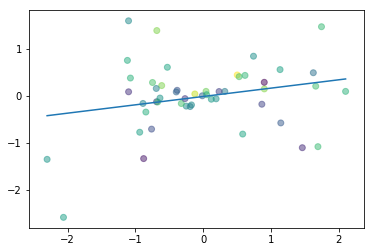

In [41]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.randn(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=.5)
plt.show()


In [112]:
x_values = [i for i in range(11)]
# convert to numpy array
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [113]:
# 2D array is required! therefore, reshape
x_train = x_train.reshape(-1,1)
x_train.shape

(11, 1)

In [114]:
y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32).reshape(-1,1)
y_train.shape

(11, 1)

In [115]:
import torch
import torch.nn as nn
from torch.autograd import Variable

#### STEP 1 - CREATE THE MODEL CLASS

In [116]:
class Linreg(nn.Module):
    def __init__(self, input_size, output_size):
        super(Linreg, self).__init__()
        # linear layer
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

#### STEP 2 - INSTANTIATE THE MODEL CLASS

In [117]:
input_dim = 1
output_dim = 1

model = Linreg(input_dim, output_dim)

if torch.cuda.is_available():
    model.cuda()

#### STEP 3 - LOSS AND OPTIMIZER

In [118]:
# loss function
criterion = nn.MSELoss()
# how are you updating the parameters for every epoch?
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

#### STEP 4 - TRAIN THE MODEL

In [119]:
epochs = 100

for epoch in range(epochs):
    epoch += 1
    # convert input data to torch Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train)).cuda()
        labels = Variable(torch.from_numpy(y_train)).cuda()
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward run to get outputs
    outputs = model(inputs)
    
    # Calculate loss w.r.t labels
    loss = criterion(outputs, labels)
    
    # Compute gradients w.r.t. parameters
    loss.backward()
    
    # Update parameters
    optimizer.step()
    
    print('epoch {}, loss {:.4f}'.format(epoch, loss.data[0]))

epoch 1, loss 325.5010
epoch 2, loss 26.7578
epoch 3, loss 2.3879
epoch 4, loss 0.3979
epoch 5, loss 0.2333
epoch 6, loss 0.2176
epoch 7, loss 0.2141
epoch 8, loss 0.2116
epoch 9, loss 0.2093
epoch 10, loss 0.2069
epoch 11, loss 0.2046
epoch 12, loss 0.2023
epoch 13, loss 0.2001
epoch 14, loss 0.1978
epoch 15, loss 0.1956
epoch 16, loss 0.1935
epoch 17, loss 0.1913
epoch 18, loss 0.1892
epoch 19, loss 0.1870
epoch 20, loss 0.1850
epoch 21, loss 0.1829
epoch 22, loss 0.1808
epoch 23, loss 0.1788
epoch 24, loss 0.1768
epoch 25, loss 0.1749
epoch 26, loss 0.1729
epoch 27, loss 0.1710
epoch 28, loss 0.1691
epoch 29, loss 0.1672
epoch 30, loss 0.1653
epoch 31, loss 0.1635
epoch 32, loss 0.1616
epoch 33, loss 0.1598
epoch 34, loss 0.1580
epoch 35, loss 0.1563
epoch 36, loss 0.1545
epoch 37, loss 0.1528
epoch 38, loss 0.1511
epoch 39, loss 0.1494
epoch 40, loss 0.1477
epoch 41, loss 0.1461
epoch 42, loss 0.1445
epoch 43, loss 0.1429
epoch 44, loss 0.1413
epoch 45, loss 0.1397
epoch 46, loss 0

#### STEP 5 - PREDICT LABELS FOR TEST SET

In [129]:
# seems like a lot of additional work to move back and forth from/to gpu
if torch.cuda.is_available:
    predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
else:
    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[  0.48948133],
       [  2.56300068],
       [  4.63651991],
       [  6.71003914],
       [  8.78355789],
       [ 10.8570776 ],
       [ 12.93059635],
       [ 15.00411606],
       [ 17.07763481],
       [ 19.15115356],
       [ 21.22467422]], dtype=float32)

In [98]:
y_train

array([[  1.],
       [  3.],
       [  5.],
       [  7.],
       [  9.],
       [ 11.],
       [ 13.],
       [ 15.],
       [ 17.],
       [ 19.],
       [ 21.]], dtype=float32)

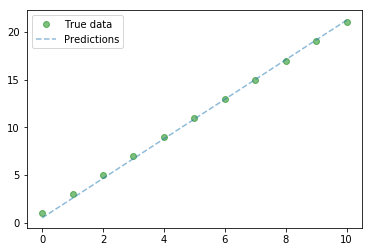

In [130]:
# clear plot
plt.clf()

# plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=.5)

# plot predictions 
plt.plot(x_train, predicted, '--', label='Predictions', alpha=.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

In [139]:
save_model = True
if save_model is True:
    # save only parameters
    torch.save(model.state_dict(), 'saved_shitty_test_model.pkl')

In [141]:
load_model = True
if load_model is True:
    model.load_state_dict(torch.load('saved_shitty_test_model.pkl'))

In [ ]:
#parameters
vocab_size = len(vocabulary)

class Net(nn.Module):
    def __init__(self, vocab_size, max_len, embedding_size, num_channels, output_size, dropout):
        super(Net, self).__init__()
        
        # initialise a Network object containing e.g. the following layers  
            # an embedding layer 
        self.embedding = nn.Embedding(vocab_size, embedding_size)
            # a Linear hidden layer 
        self.hidden = nn.Linear(input_size, output_size)
            # a convolutional layer taking input with 1 channel
        self.conv = nn.Conv2d(in_channels=1, out_channels=num_channels, kernel_size=(3,embedding_size))
            # an LSTM taking word embeddings as inputs, outputting hidden states
        self.lstm = nn.LSTM(embedding_dimension, hidden_dimension)
            # a quasi-recurrent NN input: 100, output: 200, dropout
        self.qrnn = QRNN(100, 200, dropout=.5) 
        
    
    def init_hidden(self):
        # Initialise hidden states for an lstm
        # The axes semantics are (num_layers, minibatch_size, hidden_dim)
        return (autograd.Variable(torch.zeros(1, 1, self.hidden_dim)),
                autograd.Variable(torch.zeros(1, 1, self.hidden_dim)))
    
    
    def forward(self, x):
        # determine how the input is passed through the layers
        # in example for input x, where x is a sentence        
            # convert the vector of words to a vector of word embeddings
        word_embeddings = self.embedding(x)
            # run the word_embedding vector through an lstm
        lstm_out, self.hidden = self.lstm(word_embeddings.view(len(x), 1, -1), self.hidden)
            # activation function for the convolutional layer: relu
            # the squeeze removes 1 argument / decrease the arity, 
            #      e.g. [batch_size,num_channels, Height, Width]
            #      becomes [batch_size,num_channels, Height]
        x_conv = F.relu(self.conv(x)).squeeze(3)
            # 
        
        